## An overview of different activation functions

Recall that the purpose of a machine learning model is to transform training data inputs to the model (which are features) to approximate the training output values.

Neural networks: <br> <br> 
Logistic regression models learna  set of weights that impact the linear combination phase and then are fed throuhg a single nonlinear function (sigmoid function). <br> <br>
The three most common activation functions in neural networks are: <br>
- Sigmoid function
- ReLU function
- tanh function

## ReLU function:
#### Rectified linear unit function: 
<br> 
Definition: $RELU(x)=max(0,x)$
Where $max(0,x)$ returns the maximum value between 0 and x. This means that: <br>
When x<0, 0 is returned. <br>
When x>0, x is returned. <br>
The ReLU function returns the positive component of the input value. <br>
Let's investigate the expressivity of a model that performs a linear combination of the features and weights followed by the ReLU transformation:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

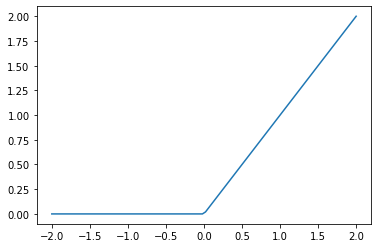

In [2]:
#Relu function
def relu(x):
    return np.maximum(x,0)

x = np.linspace(-2,2,100)

relu_y = relu(x)
#print(x)
#print(relu_y)
plt.plot(x,relu_y)
plt.show()

## The Hyperbolic Tangent Function

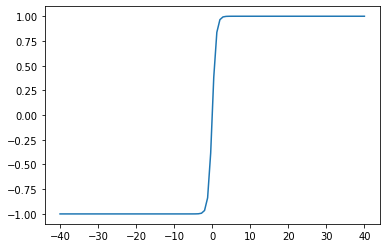

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-40, 40, 100)
tanh_y = np.tanh(x)
plt.plot(x, tanh_y)
plt.show()

Notice that like the sigmoid function, the tanh function has horizontal asymptotes as x approaches negative or positive infinity.
In addition, the tanh function constrains the range of y between (-1,1). Because of this property, both the sigmoid and tanh functions are commonly used in neural networks for classification tasks.
The ReLU function has proven to be more effective in regression tasks.

## Hidden Layers

We have worked with single layer neural networks. These networks only contain a single layer of neurons. <br>
To make predictions, a single layer of neurons in these networks directly fed their results into the output neuron(s).
<br>
We will now explore how multi-layer networks or (deep neural networks) are able to better capture nonlinearity in data. <br>
In a deep naural network, the first layer of input neurons feed into a second, intermediate layer of neurons. <br>
There exist intermediate layers known as hidden layers, because they are not directly represented in the input data or the output predictions. <br>
We will explore how adding more layers to a network and adding more neurons in the hidden layers can improve the model's ability to learn more complex relationships.

Generating data with nonlinearity in the features: use the make_moons() function from scikit-learn.

In [4]:
from sklearn.datasets import make_moons
#make_moons function will generate 100 rows of data with two features.
##data = make_moons()

#Incorporate the noise parameter to specify the SD of the Gaussian noise we want added to the data.
data = make_moons(random_state = 3, noise = 0.04)

In [5]:
#Separate resulting NumPy object into two pandas dataframes.
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
#print(features)
#print(labels)

Text(0.5, 0, 'y')

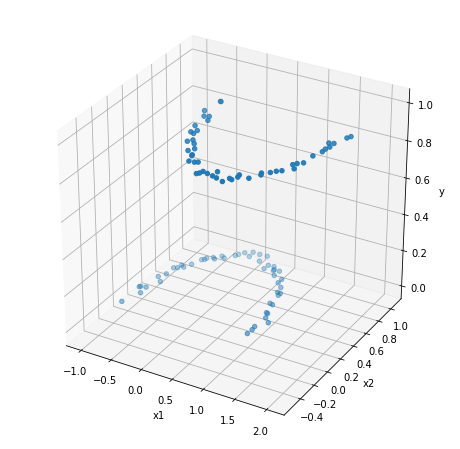

In [6]:
#Generate a 3D scatter plot of the data.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')

ax.scatter(features[0],features[1],labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')



We are now interested in learning how to train a neural network with a hidden layer using scikit-learn. We will compare this to a logistic regression model.


## Neural Network Classes

Sci-kit learn contains two classes for working with neural networks. <br>
- MLPClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html <br>
- MLPRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html <br>


We will work with the MLPClassifier class first.
The MLPClassifier class follows the standard model.fit() and model.predict() pattern.<br>

It is important to note that while scikit-learn is friendly to learning Machine Learning models,  it has limitations when it comes to working with neural networks in production.<br>
A few limitations: <br>
- Scikit-learn only supports using the same activation function for all layers.
- Scikit-learn struggles to scale to larger datasets. Theano and Tensorflow support offloading some computation to the GPU to overcome bottlenecks.

## Training two models with scikit-learn on the training set:
- Standard Logistic Regression model
- Neural Network with: Single hidden layer, single neuron in the hidden layer, sigmoid activation function.

Necessary packages

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

Create data, partition training and testing datasets, implement Logistic Regression and Single Neuron Neural Network 

In [8]:
data = make_moons(100,random_state=3, noise = 0.04)
#Obtain features and labels from our make_moons() data
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
#Add a bias column to our features.
features["bias"] = 1

#Shuffle the index values for the features dataset.
shuffled_index = np.random.permutation(features.index)

#Shuffle the data for the features dataset.
shuffled_data = features.loc[shuffled_index]
#Shuffle the data for the labels dataset.
shuffled_labels = labels.loc[shuffled_index]

#Now we are going to split the data in half.
#Take the length of our dataset and divide it in half, convert to integer.
mid_length = int(len(shuffled_data)/2)
#Partition the data using the calculated midlength.

#partition features
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length: len(shuffled_data)]

#partition labels
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(shuffled_labels)]

#Utilizing the Multi-layer Perceptron classifier from sklearn.neural_network:

#Number of hidden neurons is one, with a sigmoid activation function (logistic)
mlp = MLPClassifier(hidden_layer_sizes=(1,), activation ='logistic')

#fit the data given our training set for features and labels.
mlp.fit(train_features, train_labels)

#determine predictions using Neural Networks
nn_predictions = mlp.predict(test_features)

#Create Logistic Regression Model
lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

#Determine accuracy for each model

#Single Neuron Single Layer NN Model Accuracy
nn_accuracy = accuracy_score(test_labels,nn_predictions)
#Logistic Regression Model Accuracy
log_accuracy = accuracy_score(test_labels,log_predictions)

#Display accuracy
print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)


Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As we can observe, when we compare the effectiveness of our logistic regression model and our neural network model (single neuron) the logistic regression model(80%) performed much better compared to the neural network model (56%). <br>
This is because the network architecture does not give the model the ability to capture nonlinearity in the data. <br>
Now lets take a look at a network with a single hidden layer of multiple neurons: <br> <br>
Fully connected network: A network in which all the neurons has a connection between itself and all the neurons in the next layer. <br>
Feedforward network: A network whose computation flows from left (input layer) to right (hidden layer then to output layer). <br>
We are interested in creating a fully connected, feed forward network. <br>
Lets experiment by adding more neurons to the hidden layer in the neural network we created and see how the accuracy changes.<br>



In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

In [10]:
#Generate data
data = make_moons(100,random_state=3, noise = 0.04)
#Obtain features and labels from our make_moons() data
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
#Add a bias column to our features.
features["bias"] = 1

#Shuffle the index values for the features dataset.
shuffled_index = np.random.permutation(features.index)

#Shuffle the data for the features dataset.
shuffled_data = features.loc[shuffled_index]
#Shuffle the data for the labels dataset.
shuffled_labels = labels.loc[shuffled_index]

#Now we are going to split the data in half.
#Take the length of our dataset and divide it in half, convert to integer.
mid_length = int(len(shuffled_data)/2)
#Partition the data using the calculated midlength.

#partition features
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length: len(shuffled_data)]

#partition labels
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(shuffled_labels)]

#Create arrays with different hidden neuron sizes
neurons = [1, 5, 10, 15, 20, 25]
#Array to store accuriacies
accuracies = []

#Loop through neuron numbers and create MLPclass to test predictions with varying hidden neuron numbers.
for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.48, 0.78, 0.86, 0.82, 0.84, 0.86]


/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/juancarlosreyes/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Observe that our test set prediction increaed accuracy to 0.82 when using around 10 hidden neurons.<br>
As we increased the number of neurons in the hidden layer, the accuracy vastly improved between models.

Now we are interested in determining the effect of increasing the number of hidden layers on the overall accuracy of the network.<br>
To determine the number of weights between the layers, multiply the number of neurons between those two layers.<br>
Recall that these weights will be represented as weight matrices.

To specify the number of hidden layers and the number of neurons in each hidden layer, we change the tuple we pass into the
hidden_layer_sizes parameter: 

In [11]:
#Network with two hidden layers, 1 neuron in each hidden layer:
mlp = MLPClassifier(hidden_layer_sizes = (1,1), activation = 'logistic')
#
#Network with three hidden layers of verying neuron counts in each hidden layer.
mlp = MLPClassifier(hidden_layer_sizes = (2,6,10), activation = 'logistic')



The number of hidden layers and number of neurons in each hidden layer are hypermparameters that act as knobs for the model behaviour.


## Neural Networks with varying hidden layers and varying neuron counts:

In [14]:
#Generate data
data = make_moons(100,random_state=3, noise = 0.04)
#Obtain features and labels from our make_moons() data
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
#Add a bias column to our features.
features["bias"] = 1

#Shuffle the index values for the features dataset.
shuffled_index = np.random.permutation(features.index)

#Shuffle the data for the features dataset.
shuffled_data = features.loc[shuffled_index]
#Shuffle the data for the labels dataset.
shuffled_labels = labels.loc[shuffled_index]

#Now we are going to split the data in half.
#Take the length of our dataset and divide it in half, convert to integer.
mid_length = int(len(shuffled_data)/2)
#Partition the data using the calculated midlength.

#partition features
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length: len(shuffled_data)]

#partition labels
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(shuffled_labels)]

#Create arrays with different hidden neuron sizes
neurons = [1, 5, 10, 15, 20, 25]
#Array to store accuriacies
nn_accuracies = []

#Loop through neuron numbers and create MLPclass to test predictions with varying hidden neuron numbers.
for n in neurons:
    #Train neural network with two hidden layers, each containing the 
    ## same number of neurons (the current value of neurons).
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter = 10000)
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(nn_accuracies)

[]


As we increase the number of neurons in each layer, accuracy is greatly improved. 
We have to recall that this is a simple "toy" data set and so we have to be wary of implementing with real life data with noise.